# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, accuracy_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

import xgboost as xgb

CONFIG = {
    "random_state": 42
}


In [2]:
import sys
print(sys.executable)
print(sys.version)

/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/bin/python
3.12.3 (main, Jan  8 2026, 11:30:50) [GCC 13.3.0]


In [3]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1)}]')

# Carregando os Dados

In [ ]:
path = "/home/samuel-machado/churn_prediction_mk/churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn = pd.read_csv(path, index_col='customerID')

In [5]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [6]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

# AED 

## Tratando valores nulos 

In [8]:
float_transform = lambda x: np.float64(x) if x != ' ' else None

In [9]:
churn['TotalCharges'] = churn['TotalCharges'].apply(float_transform)

In [10]:
churn['TotalCharges'].mean()

np.float64(2283.3004408418656)

In [11]:
# churn.dropna(inplace=True)

In [12]:
churn.fillna(2283.3004408418656, inplace=True)

In [13]:
churn.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

## Variaveis Categoricas

### Churn

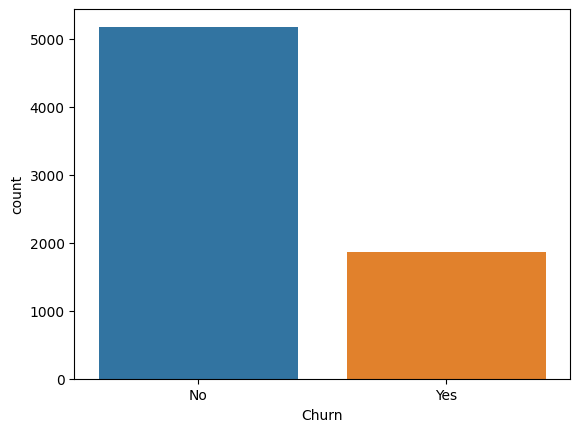

In [13]:
sns.countplot(data=churn, x='Churn', hue='Churn');

In [14]:
churn.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<p>Variavel alvo com dados desbalanceados, apresentando mais clientes que nao sairam da empresa do que os desistentes.</p>
<p>Como os desistentes sao o foco do projeto tera que ser feito um tratamento nestes dados desbalanceados</p>

### Gender

In [15]:
churn.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64

In [16]:
px.histogram(churn, x='gender', color='Churn', text_auto=True, barmode='group')

### Multiple Lines

In [17]:
px.histogram(churn, x='MultipleLines', color='Churn', text_auto=True, barmode='group') 

### Internet Service 

In [18]:
px.histogram(churn, x='InternetService', color='Churn', text_auto=True, barmode='group') 

### Partner

In [19]:
px.histogram(churn, x='Partner', color='Churn', text_auto=True, barmode='group') 

### Phone Service 

In [20]:
px.histogram(churn, x='PhoneService', color='Churn', text_auto=True, barmode='group') 

### Online Security and Backup 

In [21]:
px.histogram(churn, x='OnlineSecurity', color='Churn', text_auto=True, barmode='group') 

In [22]:
px.histogram(churn, x='OnlineBackup', color='Churn', text_auto=True, barmode='group') 

### Device Protection

In [23]:
px.histogram(churn, x='DeviceProtection', color='Churn', text_auto=True, barmode='group') 

## Variaveis Numericas

In [24]:
px.box(churn, x='MonthlyCharges', color='Churn')

In [25]:
plt.figure(figsize=(20,10))
px.box(churn, x='TotalCharges', color='Churn')

<Figure size 2000x1000 with 0 Axes>

In [26]:
px.box(churn, x='tenure', color='Churn')

# Treino, Validação, Teste

In [15]:
X = churn.drop(columns=['Churn', 'gender'])
y = churn['Churn']

In [16]:
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
2234-XADUH,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
4801-JZAZL,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


In [17]:
y

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7043, dtype: object

In [18]:
X, X_test, y, y_test = train_test_split(X,y, test_size=0.05, stratify=y, random_state=CONFIG['random_state'])
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, stratify=y, random_state=CONFIG['random_state'])  

# Pre Processamento

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

y_process = label_encoder.transform(y)

In [20]:
X_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [21]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,
6432-TWQLB,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,85.40,401.10
0626-QXNGV,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.15,1776.45
8490-BXHEO,1,No,No,18,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.55,1411.65
1867-TJHTS,0,No,No,58,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.80,4526.85
7714-YXSMB,0,No,No,26,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.50,2599.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798-DRYDS,0,Yes,Yes,17,Yes,Yes,DSL,No,No,Yes,Yes,No,No,One year,Yes,Mailed check,61.95,1070.70
2692-AQCPF,0,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),108.05,7118.90
3795-GWTRD,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),75.55,4707.85


In [22]:
cat_cols = [
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

num_cols = [
    'MonthlyCharges',
    'TotalCharges'
]

In [23]:
ohe = ColumnTransformer(
    transformers=[
        (
            'OneHot', OneHotEncoder(), cat_cols
        ),
        (
            'Standart', StandardScaler(), num_cols 
        )
    ],
    remainder='passthrough'
)


X_train = ohe.fit_transform(X_train)
X_val = ohe.transform(X_val)
X_test = ohe.transform(X_test)


X_process = ohe.transform(X)

In [24]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.68478354,
        -0.83607699,  5.        ],
       [ 1.        ,  0.        ,  0.        , ..., -1.35696938,
        -0.2259216 , 72.        ],
       [ 0.        ,  1.        ,  1.        , ...,  0.52311004,
        -0.38776018, 18.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.35643633,
         1.07455428, 63.        ],
       [ 1.        ,  0.        ,  1.        , ..., -1.48030793,
        -0.96659483,  5.        ],
       [ 1.        ,  0.        ,  1.        , ..., -1.52530983,
        -0.56971766, 55.        ]], shape=(5352, 44))

# Modelos 

## Arvore de Decisao 72%

In [56]:
mdl_tree = DecisionTreeClassifier(random_state=CONFIG['random_state'])

mdl_tree.fit(X_train, y_train)

y_pred_tree = mdl_tree.predict(X_val)

print(f'Acuracia: {accuracy_score(y_val, y_pred_tree)}')

Acuracia: 0.717814371257485


In [57]:
print(classification_report(y_val, y_pred_tree))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       981
           1       0.47      0.49      0.48       355

    accuracy                           0.72      1336
   macro avg       0.64      0.65      0.64      1336
weighted avg       0.72      0.72      0.72      1336



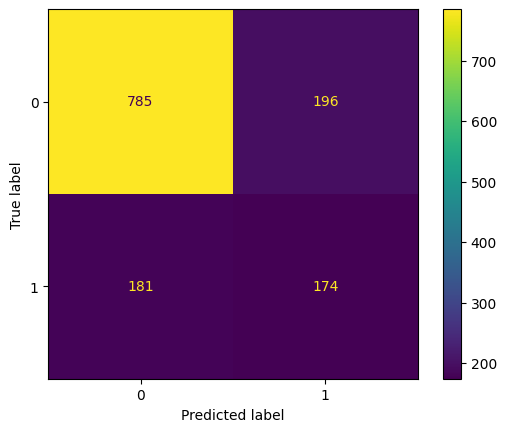

In [58]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_tree)

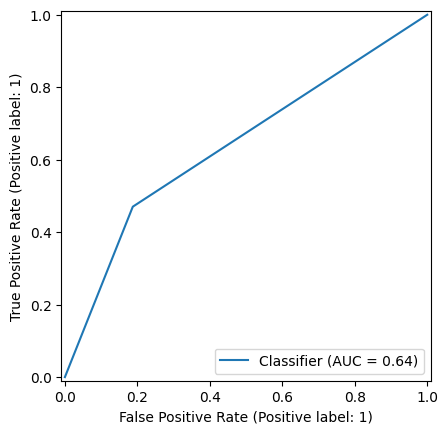

In [59]:
RocCurveDisplay.from_predictions(y_pred_tree, y_val)

## Random Forest 77%

In [60]:
mdl_random_tree = RandomForestClassifier(random_state=CONFIG['random_state'])

mdl_random_tree.fit(X_train, y_train)

y_pred_random_tree = mdl_random_tree.predict(X_val)

print(f'Acuracia: {accuracy_score(y_val, y_pred_random_tree)}')

Acuracia: 0.7776946107784432


In [61]:
print(classification_report(y_val, y_pred_random_tree))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       981
           1       0.61      0.45      0.52       355

    accuracy                           0.78      1336
   macro avg       0.71      0.67      0.69      1336
weighted avg       0.76      0.78      0.77      1336



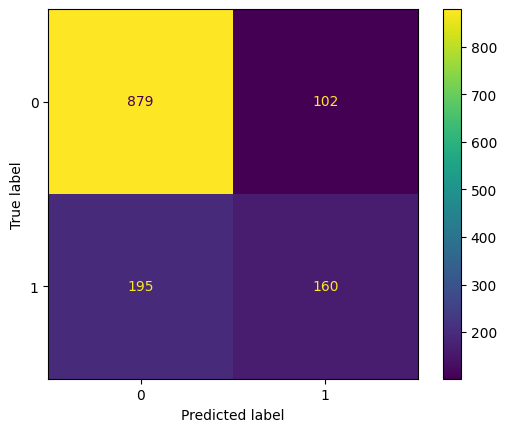

In [62]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_random_tree)

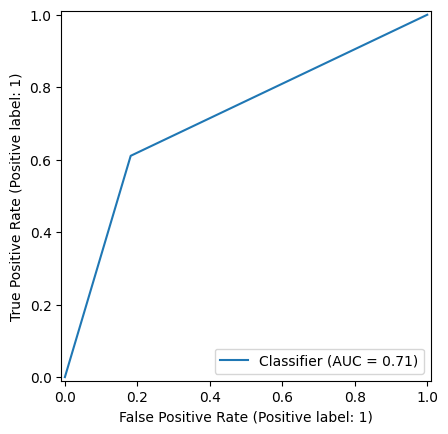

In [63]:
RocCurveDisplay.from_predictions(y_pred_random_tree, y_val)

## Regressao Logistica 80%

In [64]:
mdl_rl = LogisticRegression(random_state=CONFIG['random_state'])

mdl_rl.fit(X_train, y_train)

y_pred_rl = mdl_rl.predict(X_val)

print(f'{accuracy_score(y_val, y_pred_rl)}')

0.7956586826347305


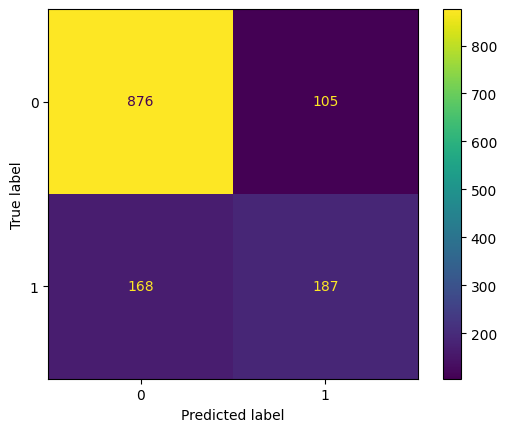

In [65]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rl)

In [66]:
print(classification_report(y_val, y_pred_rl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       981
           1       0.64      0.53      0.58       355

    accuracy                           0.80      1336
   macro avg       0.74      0.71      0.72      1336
weighted avg       0.79      0.80      0.79      1336



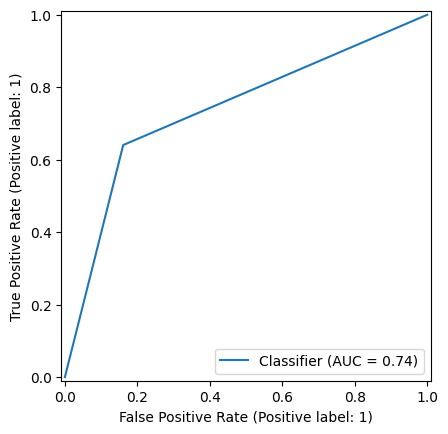

In [67]:
RocCurveDisplay.from_predictions(y_pred_rl, y_val)

## XGBoost

In [83]:
import xgboost as xgb

In [84]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic')
xg_cl.fit(X_train, y_train)
y_pred = xg_cl.predict(X_val)

In [85]:
print(f'Acurácia: {accuracy_score(y_val, y_pred)}')

Acurácia: 0.7765321375186846


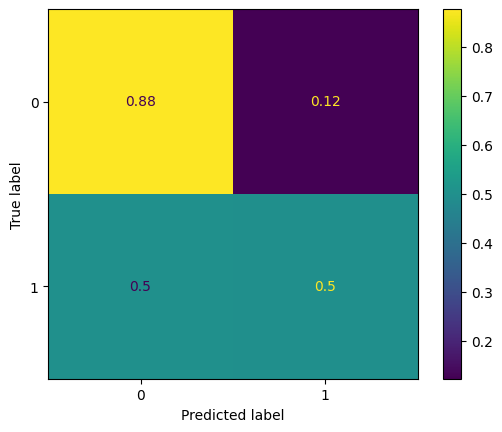

In [87]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true');

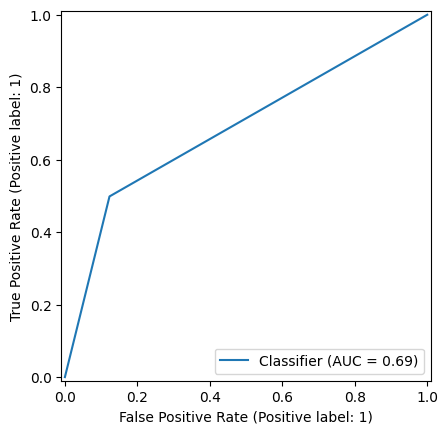

In [29]:
RocCurveDisplay.from_predictions(y_val, y_pred)

In [30]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       983
           1       0.59      0.50      0.54       355

    accuracy                           0.78      1338
   macro avg       0.71      0.69      0.70      1338
weighted avg       0.77      0.78      0.77      1338



### Cross Validation

In [25]:
dmatrix = xgb.DMatrix(data=X_process, label=y_process)

In [26]:
params = {
    'objective':'binary:logistic',
}

cv_xgb_resultados = xgb.cv(dtrain=dmatrix, 
                           params=params, 
                           nfold=3, 
                           num_boost_round=5, 
                           metrics='error',
                           as_pandas=True,
                           seed=CONFIG['random_state']
                           )

print(cv_xgb_resultados)

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.265321         0.002417         0.265321        0.004834
1          0.213752         0.006504         0.223916        0.007613
2          0.191629         0.006637         0.209865        0.010637
3          0.182138         0.010888         0.204335        0.006960
4          0.174514         0.010565         0.201495        0.008941


In [27]:
acuracia_xgb = 1 - cv_xgb_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia_xgb}')

Acuracia: 0.7985052316890882


In [29]:
params = {
    'objective':'binary:logistic',
}

cv_xgb_resultados = xgb.cv(dtrain=dmatrix, 
                           params=params, 
                           nfold=3, 
                           num_boost_round=100, 
                           metrics='error',
                           as_pandas=True,
                           early_stopping_rounds=5,
                           seed=CONFIG['random_state']
                           )

print(cv_xgb_resultados)
acuracia_xgb = 1 - cv_xgb_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia_xgb}')

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.265321         0.002417         0.265321        0.004834
1          0.213752         0.006504         0.223916        0.007613
2          0.191629         0.006637         0.209865        0.010637
3          0.182138         0.010888         0.204335        0.006960
4          0.174514         0.010565         0.201495        0.008941
5          0.170703         0.010520         0.200299        0.009097
6          0.163229         0.008331         0.199402        0.010083
7          0.160015         0.006682         0.198804        0.010671
8          0.157474         0.007856         0.197309        0.010427
Acuracia: 0.8026905829596412


### Tuning XGBoost

In [32]:
params = {
    'objective':'binary:logistic',
    'colsamples_bytree':0.3,
    'learning_rate':0.1,
    'max_depth':5
}

cv_xgb_resultados = xgb.cv(dtrain=dmatrix, 
                           params=params, 
                           nfold=3, 
                           num_boost_round=100, 
                           metrics='error',
                           as_pandas=True,
                           early_stopping_rounds=5,
                           seed=CONFIG['random_state']
                           )

print(cv_xgb_resultados)
acuracia_xgb = 1 - cv_xgb_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia_xgb}')

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.265321         0.002417         0.265321        0.004834
1           0.265321         0.002417         0.265321        0.004834
2           0.265321         0.002417         0.265321        0.004834
3           0.265321         0.002417         0.265321        0.004834
4           0.257997         0.004244         0.259940        0.008432
5           0.232661         0.001374         0.236323        0.006094
6           0.221151         0.002565         0.227055        0.007271
7           0.209417         0.004936         0.220777        0.009444
8           0.203288         0.004775         0.212108        0.008080
9           0.199028         0.006757         0.209567        0.009895
10          0.196562         0.006034         0.207175        0.009470
11          0.193423         0.008052         0.207773        0.010029
12          0.190658         0.008212         0.204335        0.009752
13    

/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/xgboost/training.py:225: UserWarning: [11:30:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "colsamples_bytree" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/xgboost/training.py:231: UserWarning: [11:30:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "colsamples_bytree" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)


In [44]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

In [ ]:
params = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 10], 
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [10, 25, 50],
}

In [54]:
modelo_xgb  = xgb.XGBClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=CONFIG['random_state'])

random_search_xgb = GridSearchCV(estimator=modelo_xgb, 
                                       param_grid=params, 
                                       cv=10, 
                                    #    random_state=CONFIG['random_state'],
                                       scoring='f1',
                                       verbose=1
                                       )

random_search_xgb.fit(X_process, y_process)

print(f'Melhores paramentros encontrados: {random_search_xgb.best_params_}')
print(f'F1: {random_search_xgb.best_score_}')

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Melhores paramentros encontrados: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
F1: 0.6013174937764396


In [55]:
y_pred = random_search_xgb.predict(X_test)

In [56]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       292
           1       0.48      0.74      0.58        61

    accuracy                           0.82       353
   macro avg       0.71      0.78      0.73       353
weighted avg       0.86      0.82      0.83       353



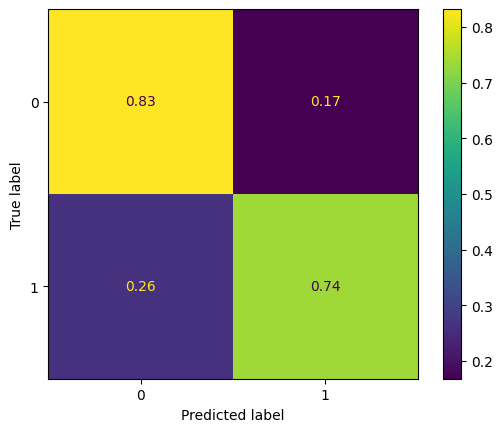

In [59]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, normalize='true')

In [60]:
accuracy_score(y_pred, y_test)

0.8158640226628895

### Imblearn

In [64]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.combine import SMOTEENN

In [68]:
params_imb = {
        'model__learning_rate': [0.1, 0.2, 0.3],
        'model__max_depth': [0, 2, 4, 6, 10], 
        'model__colsample_bytree': [0.1, 0.5, 1],
        'model__n_estimators': [10, 25, 50],
}

In [78]:
xgb_pipeline = imbpipeline([
    ('sampling', SMOTEENN(sampling_strategy='minority', random_state=CONFIG['random_state'])),
    ('model', xgb.XGBClassifier(random_state=CONFIG['random_state']))
])

# GridSearchCV
imb_search_xgb = GridSearchCV(
    estimator=xgb_pipeline, 
    param_grid=params_imb,  # Certifique-se que os parâmetros têm prefixo 'model__'
    cv=10,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Recomendo adicionar para paralelizar
)

imb_search_xgb.fit(X_process, y_process)
print(f'Melhores parâmetros encontrados: {imb_search_xgb.best_params_}')
print(f'F1: {imb_search_xgb.best_score_}')

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
Melhores parâmetros encontrados: {'model__colsample_bytree': 0.1, 'model__learning_rate': 0.3, 'model__max_depth': 6, 'model__n_estimators': 50}
F1: 0.7512705530642749


In [79]:
y_pred_imb = imb_search_xgb.predict(X_test) 

In [80]:
print(classification_report(y_pred_imb, y_test))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       216
           1       0.71      0.49      0.58       137

    accuracy                           0.73       353
   macro avg       0.72      0.68      0.69       353
weighted avg       0.72      0.73      0.71       353



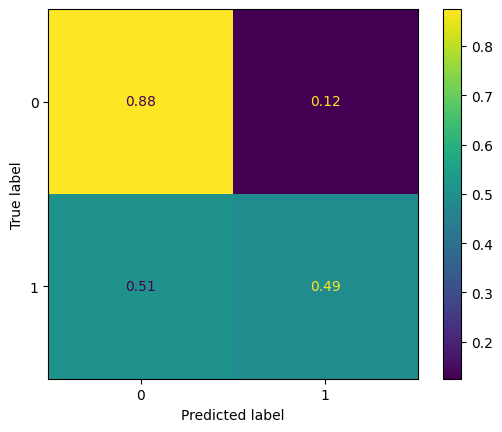

In [81]:
ConfusionMatrixDisplay.from_predictions(y_pred_imb, y_test, normalize='true')

# Tratamento de dados desbalanceados

## Undersampling

In [62]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline

In [18]:
mdl_tree = DecisionTreeClassifier()
mdl_random_tree = RandomForestClassifier()
mdl_lr = LogisticRegression()


tree_pipeline = imbpipeline(
    [
        ('undersample', NearMiss(version=3)),
        ('arvore', mdl_tree)
    ]
)


random_tree_pipeline = imbpipeline(
    [
        ('undersample', NearMiss(version=3)),
        ('arvore', mdl_random_tree)
    ]
)



lr_pipeline = imbpipeline(
    [
        ('undersample', NearMiss(version=3)),
        ('arvore', mdl_lr)
    ]
)


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=CONFIG['random_state'])

tree_cv_results = cross_validate(tree_pipeline, X_process,y_process, cv=skf, scoring='recall')
random_tree_cv_results = cross_validate(random_tree_pipeline, X_process,y_process, cv=skf, scoring='recall')
lr_cv_results = cross_validate(lr_pipeline, X_process,y_process, cv=skf, scoring='recall')

/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (m

In [19]:
print(f'Arvore de Decisao: {intervalo_conf(tree_cv_results)}')
print(f'Random Forest: {intervalo_conf(random_tree_cv_results)}')
print(f'Regressao Logistica: {intervalo_conf(lr_cv_results)}')

Intervalo de confiança: [0.48501317615135986, 0.6676752006657543]
Arvore de Decisao: None
Intervalo de confiança: [0.49943112382348986, 0.6566089955188574]
Random Forest: None
Intervalo de confiança: [0.5986167453771682, 0.7230616650843313]
Regressao Logistica: None


## SMOTEENN

In [61]:
from imblearn.combine import SMOTEENN

In [62]:
mdl_tree = DecisionTreeClassifier()
mdl_random_tree = RandomForestClassifier()
mdl_lr = LogisticRegression()


tree_pipeline = imbpipeline(
    [
        ('SMOTEENN', SMOTEENN(sampling_strategy='minority', random_state=CONFIG['random_state'])),
        ('arvore', mdl_tree)
    ]
)


random_tree_pipeline = imbpipeline(
    [
        ('SMOTEENN', SMOTEENN(sampling_strategy='minority', random_state=CONFIG['random_state'])),
        ('arvore', mdl_random_tree)
    ]
)



lr_pipeline = imbpipeline(
    [
        ('SMOTEENN', SMOTEENN(sampling_strategy='minority', random_state=CONFIG['random_state'])),
        ('arvore', mdl_lr)
    ]
)


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=CONFIG['random_state'])

tree_cv_results = cross_validate(tree_pipeline, X_process,y_process, cv=skf, scoring='recall')
random_tree_cv_results = cross_validate(random_tree_pipeline, X_process,y_process, cv=skf, scoring='recall')
lr_cv_results = cross_validate(lr_pipeline, X_process,y_process, cv=skf, scoring='recall')

/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (m

In [63]:
print(f'Arvore de Decisao:')
intervalo_conf(tree_cv_results)
print(f'Random Forest:')
intervalo_conf(random_tree_cv_results)
print(f'Regressao Logistica:')
intervalo_conf(lr_cv_results)

Arvore de Decisao:
Intervalo de confiança: [0.6736076049107687, 0.836295270731966]
Random Forest:
Intervalo de confiança: [0.7364348894892886, 0.8669358970275652]
Regressao Logistica:
Intervalo de confiança: [0.8238740409121981, 0.9305092511591535]


In [23]:
lr_pipeline.fit(X_train, y_train)

/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('SMOTEENN', ...), ('arvore', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'minority'
,random_state,42
,smote,None
,enn,None
,n_jobs,None
,penalty,'l2'
,dual,False


In [24]:
y_pred_final = lr_pipeline.predict(X_test)
print(f"Acuracia: {accuracy_score(y_test, y_pred_final)}")

Acuracia: 0.6912181303116147


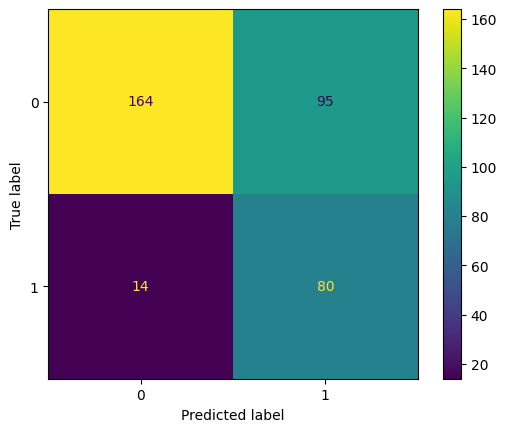

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final)

# Tuning 

In [88]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

In [90]:
params_decision_tree = {
    "model__criterion": ["gini", "entropy", "log_loss"],
    "model__max_depth": [5, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"],
}

In [91]:
params_random_forest = {
    "model__n_estimators": [100, 200, 300],
    "model__criterion": ["gini", "entropy", "log_loss"],
    "model__max_depth": [5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"]
}

In [101]:
params_logistic_regression = {
    "model__penalty": ["l1", "l2", "elasticnet"],
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__solver": ["liblinear", "saga", "lbfgs", "newton-cg"],
    "model__max_iter": [50,100, 200],
}

In [110]:
tree_pipeline = Pipeline(
    [
        ('rfe', RFE(estimator=DecisionTreeClassifier(),)),
        ('model', DecisionTreeClassifier())
    ]
)


random_tree_pipeline = Pipeline(
    [
        ('rfe', RFE(estimator=DecisionTreeClassifier(),)),
        ('model', RandomForestClassifier())
    ]
)


lr_pipeline = Pipeline(
    [
        ('rfe', RFE(estimator=DecisionTreeClassifier(),)),
        ('model', LogisticRegression())
    ]
)

tree_grid = GridSearchCV(
    estimator=tree_pipeline,
    param_grid=params_decision_tree,
    cv=5,
    scoring='f1',
    
)

random_tree_grid = GridSearchCV(
    estimator=random_tree_pipeline,
    param_grid=params_random_forest,
    cv=5,
    scoring='f1',
    
)

lr_grid = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=params_logistic_regression,
    cv=5,
    scoring='f1',
    
)



tree_grid.fit(X_process,y_process)
random_tree_grid.fit(X_process,y_process)
lr_grid.fit(X_process,y_process)

/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/samuel-machado/.cache/pypoetry/virtualenvs/churn-prediction-mk-W5RhXu7G-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hom

,estimator,Pipeline(step...egression())])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__max_iter': [50, 100, ...], 'model__penalty': ['l1', 'l2', ...], 'model__solver': ['liblinear', 'saga', ...]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,DecisionTreeClassifier()


In [115]:
print(tree_grid.best_params_)

{'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'log2', 'model__max_depth': 5, 'model__criterion': 'entropy'}


In [116]:
print(random_tree_grid.best_params_)

{'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 5, 'model__criterion': 'gini'}


In [117]:
print(lr_grid.best_params_)

{'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__max_iter': 100, 'model__C': 0.01}


In [111]:
best_tree = tree_grid.best_estimator_
best_random_tree = random_tree_grid.best_estimator_
best_lr = lr_grid.best_estimator_

In [73]:
best_tree_features = best_tree.named_steps['feature_selection'].support_
best_random_tree_features = best_random_tree.named_steps['feature_selection'].support_
best_lr_features = best_lr.named_steps['feature_selection'].support_


KeyError: 'feature_selection'

In [43]:
print(best_lr_features)

[False False  True  True False False False  True False  True False False
 False  True  True False  True False  True  True False False False False
 False  True  True  True False False  True False False  True  True  True
  True  True False  True  True  True False  True  True False]


# Modelos Finais 

## Teste 1 com Feature Selection, metrica Recall

In [121]:
y_pred_best_tree = best_tree.predict(X_test)
y_pred_best_random_tree = best_random_tree.predict(X_test)
y_pred_best_lr = best_lr.predict(X_test)



print(f'Arvore de Decisao: {accuracy_score(y_pred_best_tree, y_test)}')
print(f'Random Forest: {accuracy_score(y_pred_best_random_tree, y_test)}')
print(f'Regressao Logistica: {accuracy_score(y_pred_best_lr, y_test)}')

Arvore de Decisao: 0.6827195467422096
Random Forest: 0.6912181303116147
Regressao Logistica: 0.6713881019830028


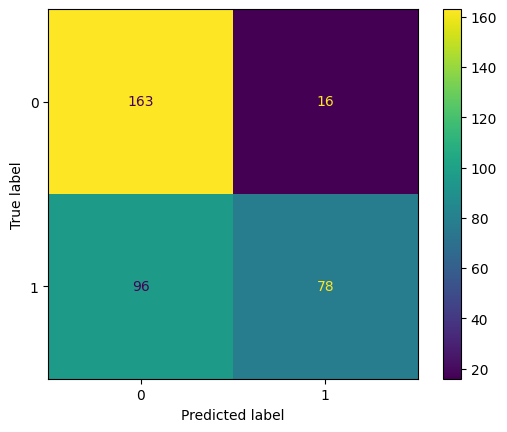

In [122]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_tree, y_test)

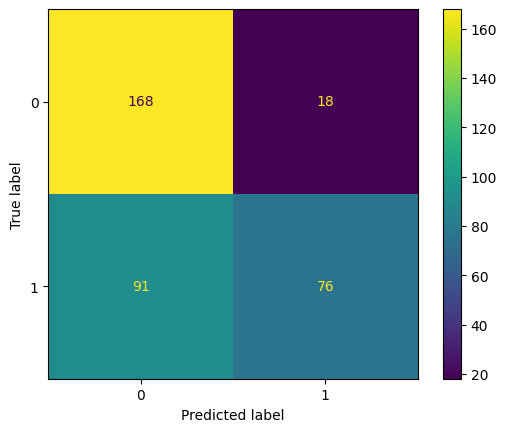

In [123]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_random_tree, y_test)

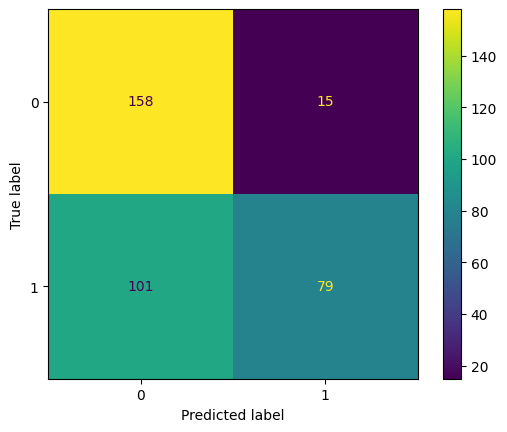

In [124]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_lr, y_test)

## Teste 2 com Feature Selecion, metrica F1

In [35]:
y_pred_best_tree = best_tree.predict(X_test)
y_pred_best_random_tree = best_random_tree.predict(X_test)
y_pred_best_lr = best_lr.predict(X_test)



print(f'Arvore de Decisao: {accuracy_score(y_pred_best_tree, y_test)}')
print(f'Random Forest: {accuracy_score(y_pred_best_random_tree, y_test)}')
print(f'Regressao Logistica: {accuracy_score(y_pred_best_lr, y_test)}')

Arvore de Decisao: 0.7138810198300283
Random Forest: 0.7252124645892352
Regressao Logistica: 0.6968838526912181


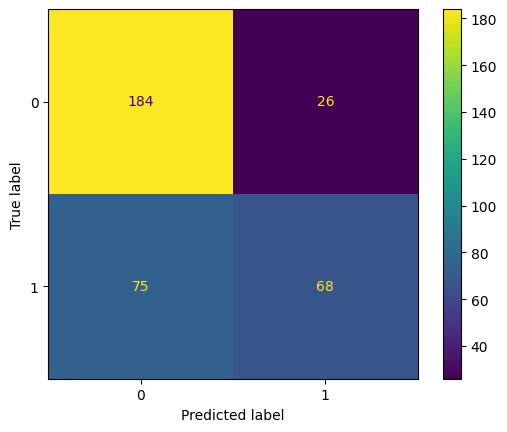

In [36]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_tree, y_test)

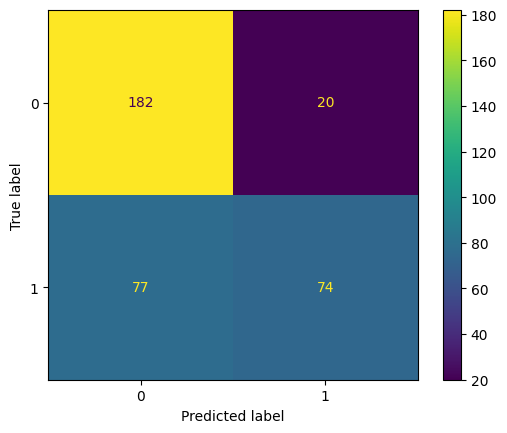

In [37]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_random_tree, y_test)

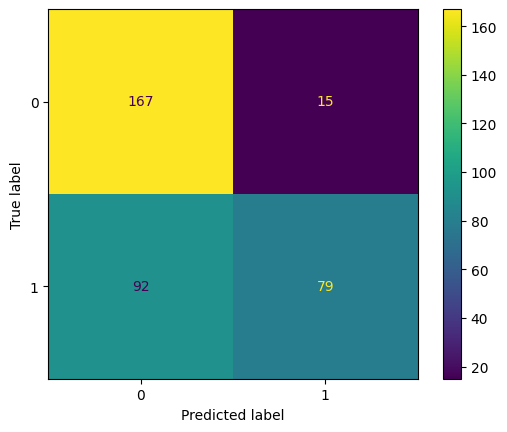

In [38]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_lr, y_test)

## Teste 3 Sem Feature Selection (RFE), metrica F1, sem coluna gender

In [68]:
y_pred_best_tree = best_tree.predict(X_test)
y_pred_best_random_tree = best_random_tree.predict(X_test)
y_pred_best_lr = best_lr.predict(X_test)



print(f'Arvore de Decisao: {accuracy_score(y_pred_best_tree, y_test)}')
print(f'Random Forest: {accuracy_score(y_pred_best_random_tree, y_test)}')
print(f'Regressao Logistica: {accuracy_score(y_pred_best_lr, y_test)}')

Arvore de Decisao: 0.7450424929178471
Random Forest: 0.7393767705382436
Regressao Logistica: 0.7053824362606232


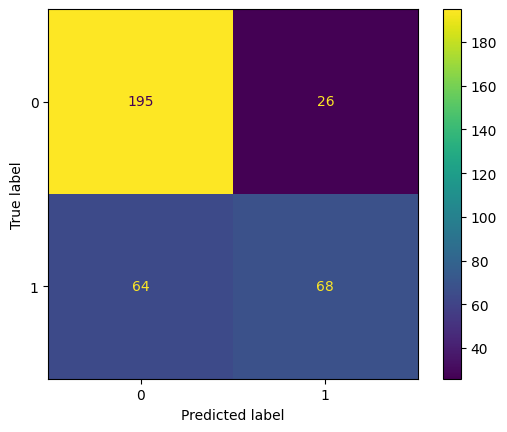

In [69]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_tree, y_test)

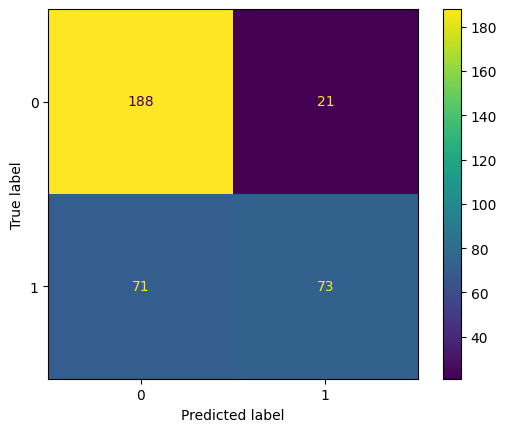

In [70]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_random_tree, y_test)

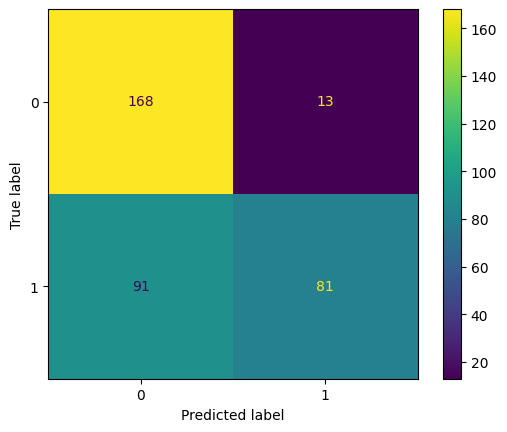

In [71]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_lr, y_test)

## Teste 4 Sem Feature Selection (RFE), metrica recall, sem coluna gender, 100 interacoes RandomSearchCV

In [75]:
y_pred_best_tree = best_tree.predict(X_test)
y_pred_best_random_tree = best_random_tree.predict(X_test)
y_pred_best_lr = best_lr.predict(X_test)



print(f'Arvore de Decisao: {accuracy_score(y_pred_best_tree, y_test)}')
print(f'Random Forest: {accuracy_score(y_pred_best_random_tree, y_test)}')
print(f'Regressao Logistica: {accuracy_score(y_pred_best_lr, y_test)}')

Arvore de Decisao: 0.6487252124645893
Random Forest: 0.7082152974504249
Regressao Logistica: 0.7053824362606232


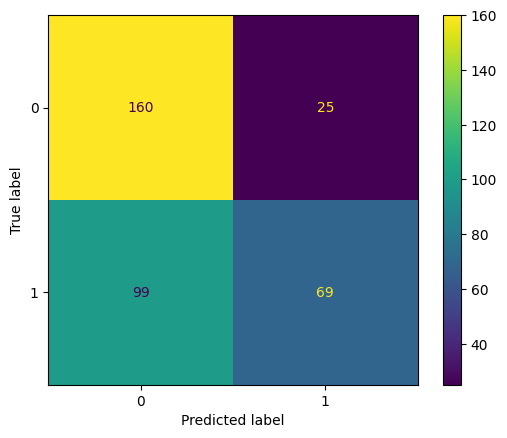

In [76]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_tree, y_test)

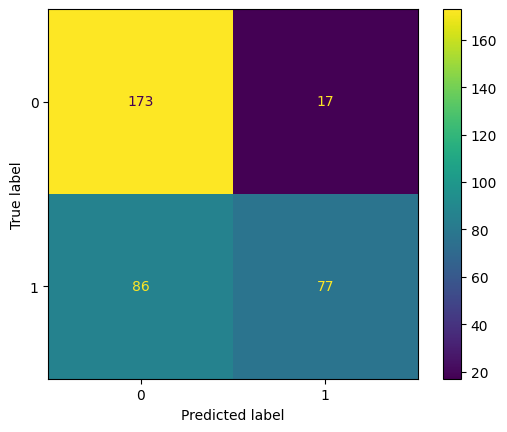

In [77]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_random_tree, y_test)

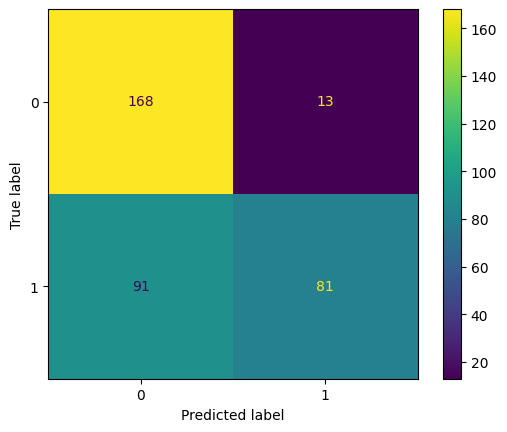

In [78]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_lr, y_test)

## Teste 5 Com Feature Selection (RFE), metrica recall, 50 interacoes RandomSearchCV, sem SMOTTENN

In [97]:
y_pred_best_tree = best_tree.predict(X_test)
y_pred_best_random_tree = best_random_tree.predict(X_test)
y_pred_best_lr = best_lr.predict(X_test)



print(f'Arvore de Decisao: {accuracy_score(y_pred_best_tree, y_test)}')
print(f'Random Forest: {accuracy_score(y_pred_best_random_tree, y_test)}')
print(f'Regressao Logistica: {accuracy_score(y_pred_best_lr, y_test)}')

Arvore de Decisao: 0.7960339943342776
Random Forest: 0.8158640226628895
Regressao Logistica: 0.7932011331444759


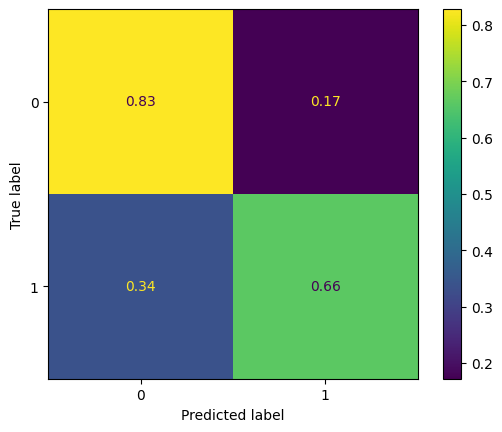

In [98]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_tree, y_test, normalize='true')

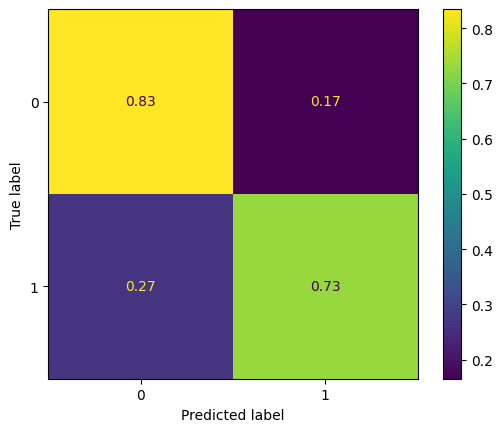

In [99]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_random_tree, y_test, normalize='true')

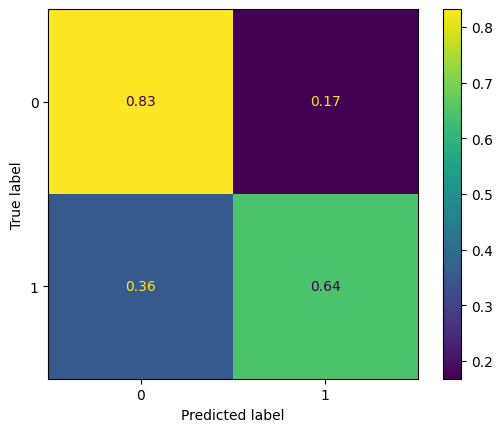

In [100]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_lr, y_test, normalize='true')

## Teste 6 Com Feature Selection (RFE), metrica recall, GridSearch, sem SMOTTENN

In [106]:
y_pred_best_tree = best_tree.predict(X_test)
y_pred_best_random_tree = best_random_tree.predict(X_test)
y_pred_best_lr = best_lr.predict(X_test)



print(f'Arvore de Decisao: {accuracy_score(y_pred_best_tree, y_test)}')
print(f'Random Forest: {accuracy_score(y_pred_best_random_tree, y_test)}')
print(f'Regressao Logistica: {accuracy_score(y_pred_best_lr, y_test)}')

Arvore de Decisao: 0.7818696883852692
Random Forest: 0.8101983002832861
Regressao Logistica: 0.8045325779036827


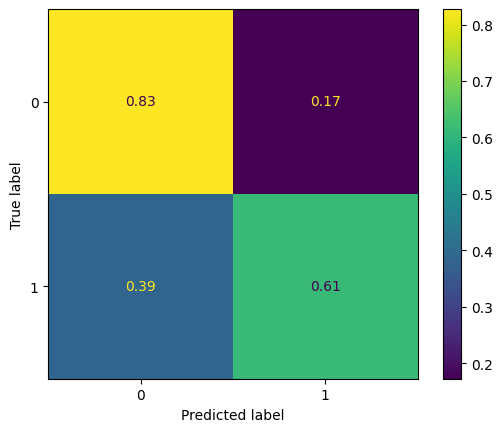

In [107]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_tree, y_test, normalize='true')

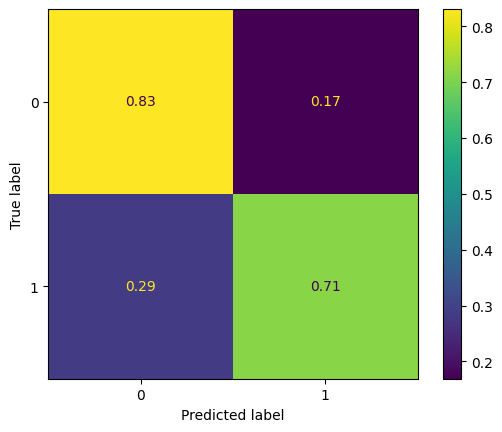

In [108]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_random_tree, y_test, normalize='true')

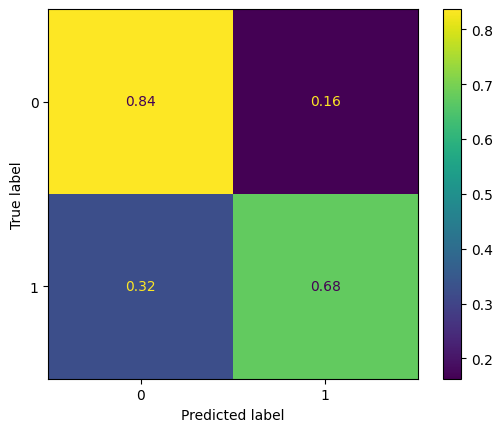

In [109]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_lr, y_test, normalize='true')

## Teste 7 Com Feature Selection (RFE), metrica f1, GridSearch, sem SMOTTENN

In [112]:
y_pred_best_tree = best_tree.predict(X_test)
y_pred_best_random_tree = best_random_tree.predict(X_test)
y_pred_best_lr = best_lr.predict(X_test)



print(f'Arvore de Decisao: {accuracy_score(y_pred_best_tree, y_test)}')
print(f'Random Forest: {accuracy_score(y_pred_best_random_tree, y_test)}')
print(f'Regressao Logistica: {accuracy_score(y_pred_best_lr, y_test)}')

Arvore de Decisao: 0.7705382436260623
Random Forest: 0.8158640226628895
Regressao Logistica: 0.8045325779036827


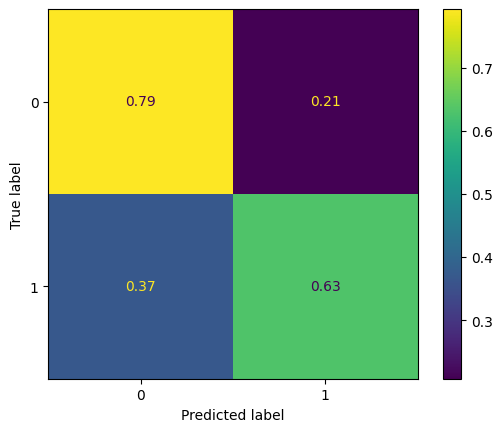

In [113]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_tree, y_test, normalize='true')

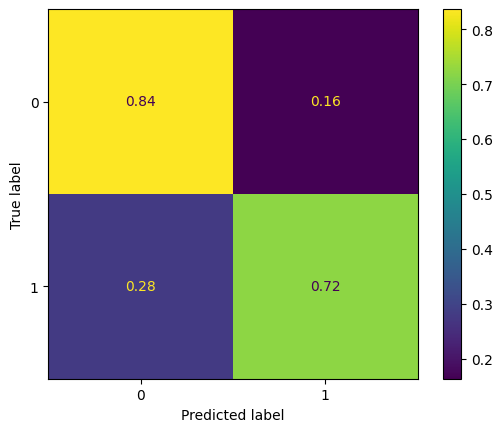

In [114]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_random_tree, y_test, normalize='true')

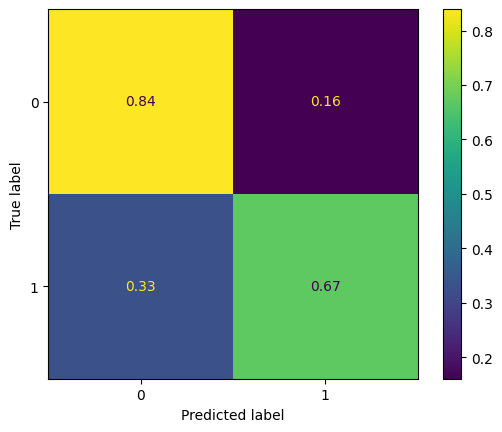

In [115]:
ConfusionMatrixDisplay.from_predictions(y_pred_best_lr, y_test, normalize='true')